In [1]:
import numpy as np
import pandas as pd

In [5]:
# Concatenating
# stacking two data frames
# plain stacking with no intelligence
# dumb stacking


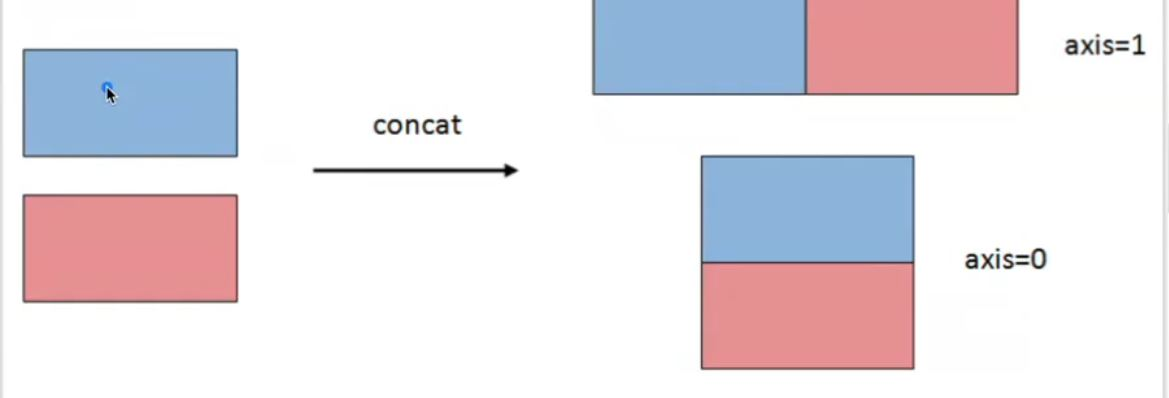

In [4]:
from IPython import display
display.Image("concat.JPG")

In [7]:
a = pd.DataFrame({'A' :[10,30], 'B':[20,40]})
b = pd.DataFrame({'A' :[10,30], 'C':[20,40]})

In [8]:
a

,A,B
0,10,20
1,30,40


In [9]:
b

,A,C
0,10,20
1,30,40


In [11]:
pd.concat([a,b]) # vertical stacking along 0 axis

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
0,10,NaN,20.0
1,30,NaN,40.0


In [12]:
pd.concat([a,b] , axis=0) # vertical stacking along 0 axis is default

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
0,10,NaN,20.0
1,30,NaN,40.0


In [13]:
pd.concat([a,b] , axis=1) # horizontal stacking along 1 axis

,A,B,A,C
0,10,20,10,20
1,30,40,30,40


In [14]:
# accessing data after concatenation

In [16]:
pd.concat([a,b] , axis=0).loc[0]

,A,B,C
0,10,20.0,NaN
0,10,NaN,20.0


In [17]:
pd.concat([a,b] , axis=0).loc[1]

,A,B,C
1,30,40.0,NaN
1,30,NaN,40.0


In [18]:
# we can assign new labels , ignoring old labels , which are repeating 

In [19]:
pd.concat([a,b] , axis=0, ignore_index=True) # new indexes will be given

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
2,10,NaN,20.0
3,30,NaN,40.0


In [20]:
#  we can provide with multi indexing 

In [21]:
pd.concat([a,b], keys=['x','y']  )

A     B     C
x 0  10  20.0   NaN
  1  30  40.0   NaN
y 0  10   NaN  20.0
  1  30   NaN  40.0

In [ ]:
#  accessing data in multi indexing 

In [22]:
pd.concat([a,b], keys=['x','y']  ).loc['x']

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN


In [23]:
# getting intersection of  columns =  inner concat
# but data is lost

In [24]:
pd.concat([a,b],join='inner')

,A
0,10
1,30
0,10
1,30


In [27]:
# getting union = outer join 
#  no data will be lost

pd.concat([a,b],join='outer') # outer is default

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
0,10,NaN,20.0
1,30,NaN,40.0


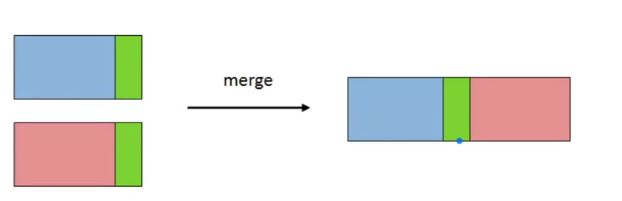

In [28]:
# merging
# smart joining
display.Image("merge.JPG")

In [33]:
users = pd.DataFrame({'userid' : [1,2,3],'name':['A' ,'B' ,'C']})
users

,userid,name
0,1,A
1,2,B
2,3,C


In [34]:
msgs = pd.DataFrame({'userid' : [1,1,2],'msg':['hello' ,'bye' ,'hi']})
msgs

,userid,msg
0,1,hello
1,1,bye
2,2,hi


In [36]:
pd.concat([users,msgs],axis=1) #difficult to make meaningful decision

,userid,name,userid,msg
0,1,A,1,hello
1,2,B,1,bye
2,3,C,2,hi


In [39]:
msgs.merge(users)

,userid,msg,name
0,1,hello,A
1,1,bye,A
2,2,hi,B


In [40]:
msgs.merge(users, how='inner')

,userid,msg,name
0,1,hello,A
1,1,bye,A
2,2,hi,B


In [41]:
msgs.merge(users, how='outer')

,userid,msg,name
0,1,hello,A
1,1,bye,A
2,2,hi,B
3,3,NaN,C


In [42]:
msgs.merge(users, how='left')

,userid,msg,name
0,1,hello,A
1,1,bye,A
2,2,hi,B


In [43]:
msgs.merge(users, how='right')

,userid,msg,name
0,1,hello,A
1,1,bye,A
2,2,hi,B
3,3,NaN,C


# PANDAS 1

In [57]:
import numpy as np
import pandas as pd

In [61]:
# Reading from a CSV file

df = pd.read_csv('gapminder_full.csv')

In [63]:
df = pd.read_csv('gapminder_full.csv')

In [64]:
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [65]:
df = pd.read_csv('gapminder_full.csv')

In [67]:
# what is a DF in python
type(df)

pandas.core.frame.DataFrame

In [68]:
#Accessing columns


In [69]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [70]:
type(df['country'])

pandas.core.series.Series

In [71]:
# DF are group of series

In [72]:
# summary of data

In [74]:
df.info() 
# to find non null data,
# object = string 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [77]:
# to find top 5 rows , default is 5, we can change the value
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [78]:
# to find top 10 rows
df.head(10)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
5,Afghanistan,1977,14880372,Asia,38.438,786.113360
6,Afghanistan,1982,12881816,Asia,39.854,978.011439
7,Afghanistan,1987,13867957,Asia,40.822,852.395945
8,Afghanistan,1992,16317921,Asia,41.674,649.341395
9,Afghanistan,1997,22227415,Asia,41.763,635.341351


In [81]:
# to find last 5 rows, default is 5
df.tail()

,country,year,population,continent,life_exp,gdp_cap
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298


In [80]:
# to find last 10 rows
df.tail(10)

,country,year,population,continent,life_exp,gdp_cap
1694,Zimbabwe,1962,4277736,Africa,52.358,527.272182
1695,Zimbabwe,1967,4995432,Africa,53.995,569.795071
1696,Zimbabwe,1972,5861135,Africa,55.635,799.362176
1697,Zimbabwe,1977,6642107,Africa,57.674,685.587682
1698,Zimbabwe,1982,7636524,Africa,60.363,788.855041
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298


In [84]:
df.shape ,df.size ,df.ndim

((1704, 6), 10224, 2)

In [85]:
# to summarize the data
#  mathematical details of float values only
df.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [88]:
# to get details about object data
df.describe(include='object')
# df.describe(include='all') to get all details

,country,continent
count,1704,1704
unique,142,5
top,Afghanistan,Africa
freq,12,624


## Basic operations on columns

In [93]:
# extracting columns
df.columns
# df.keys() same o/p as above

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

In [98]:
df[['country','gdp_cap']] #getting multiple columns

,country,gdp_cap
0,Afghanistan,779.445314
1,Afghanistan,820.853030
2,Afghanistan,853.100710
3,Afghanistan,836.197138
4,Afghanistan,739.981106
...,...,...
1699,Zimbabwe,706.157306
1700,Zimbabwe,693.420786
1701,Zimbabwe,792.449960
1702,Zimbabwe,672.038623


In [102]:
# list of countries uniquely appeared
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [103]:
# finding freq of appearing
df['country'].value_counts()

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

In [108]:
# renaming a column
# renaming will not impact the original, wont reflect
df.rename({'country':'Country_UN'} , axis=1)

# use paramenter inplace=True for permaent changes
# df.rename({'country':'Country_UN'} , axis=1,inplace=True)

,Country_UN,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [110]:
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [113]:
#   removing  a column
# df.drop('continent') # default is axis = 0 , so will give error
#  changing default to asix = 1
# Again # use paramenter inplace=True for permaent changes
df.drop('continent' , axis=1) 

,country,year,population,life_exp,gdp_cap
0,Afghanistan,1952,8425333,28.801,779.445314
1,Afghanistan,1957,9240934,30.332,820.853030
2,Afghanistan,1962,10267083,31.997,853.100710
3,Afghanistan,1967,11537966,34.020,836.197138
4,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306
1700,Zimbabwe,1992,10704340,60.377,693.420786
1701,Zimbabwe,1997,11404948,46.809,792.449960
1702,Zimbabwe,2002,11926563,39.989,672.038623


In [114]:
#  adding a column
df['new_gdp'] = df['gdp_cap']+1

In [115]:
df

,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,821.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,707.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,694.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623


In [127]:
# [i for i in range(1704)] # using list comprehension

In [126]:
# creating a new column
df['custom'] = [i for i in range(1704)]

In [129]:
df

,country,year,population,continent,life_exp,gdp_cap,new_gdp,custom
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314,0
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,821.853030,1
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710,2
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138,3
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,707.157306,1699
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,694.420786,1700
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960,1701
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623,1702


In [130]:
# removing the new custom column
df.drop('custom', axis=1, inplace=True)

In [131]:
df

,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,821.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,707.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,694.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623


## Operation on Rows

In [134]:
# accessing 66th row
df['country'][66]

'Australia'

In [135]:
#  slicing from 55 to 66
df['country'][55:66]

55    Argentina
56    Argentina
57    Argentina
58    Argentina
59    Argentina
60    Australia
61    Australia
62    Australia
63    Australia
64    Australia
65    Australia
Name: country, dtype: object

In [136]:
df['country'][0:10]

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
5    Afghanistan
6    Afghanistan
7    Afghanistan
8    Afghanistan
9    Afghanistan
Name: country, dtype: object

In [137]:
# changing the positional indexing

In [138]:
s = df['country']

In [140]:
s.index

RangeIndex(start=0, stop=1704, step=1)

In [141]:
s.index = np.arange(1,1705,1)

In [142]:
s # indexing starting from 1

1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
5       Afghanistan
           ...     
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
1704       Zimbabwe
Name: country, Length: 1704, dtype: object

In [143]:
# more on indexing
# implicit and explicit
data = pd.Series(list("abc") ,list("153"))

In [144]:
data

1    a
5    b
3    c
dtype: object

In [145]:
# follow the explicit 
data[1]

'b'

In [146]:
#  but when we do slicing 
# it will refer to implicit indexing I.E positioning indexing

data[1:3]

5    b
3    c
dtype: object

In [163]:
#  HW
data1 = pd.Series(list("abc") ,list("xyz"))
data2 = pd.Series(list("abc") ,list("122"))

# access the elemnts using indexing 
# slicing the data

In [164]:
# loc = labels
# iloc = Positional Index

In [189]:
data2 = pd.Series(list("abc") ,list("122"))

In [190]:
data2

1    a
2    b
2    c
dtype: object

In [180]:
data1.iloc[1]

'b'

In [192]:
data2.loc['2']

2    b
2    c
dtype: object

In [195]:
# working on the imported df
df.iloc[[10,100,500]]

,country,year,population,continent,life_exp,gdp_cap,new_gdp
10,Afghanistan,2002,25268405,Asia,42.129,726.734055,727.734055
100,Bangladesh,1972,70759295,Asia,45.252,630.233627,631.233627
500,Eritrea,1992,3668440,Africa,49.991,582.858510,583.858510


In [196]:
df.loc[[10,100,500]] #same as loc as indexes are same/

,country,year,population,continent,life_exp,gdp_cap,new_gdp
10,Afghanistan,2002,25268405,Asia,42.129,726.734055,727.734055
100,Bangladesh,1972,70759295,Asia,45.252,630.233627,631.233627
500,Eritrea,1992,3668440,Africa,49.991,582.858510,583.858510


In [197]:
df.iloc[-1] # the last row as per positional index

country         Zimbabwe
year                2007
population      12311143
continent         Africa
life_exp          43.487
gdp_cap       469.709298
new_gdp       470.709298
Name: 1703, dtype: object

In [198]:
# changin the index to country
temp = df.set_index('country')

In [205]:
# temp.columns
temp['life_exp'].loc['Zimbabwe']

country
Zimbabwe    48.451
Zimbabwe    50.469
Zimbabwe    52.358
Zimbabwe    53.995
Zimbabwe    55.635
Zimbabwe    57.674
Zimbabwe    60.363
Zimbabwe    62.351
Zimbabwe    60.377
Zimbabwe    46.809
Zimbabwe    39.989
Zimbabwe    43.487
Name: life_exp, dtype: float64

In [206]:
# Adding a row
df.columns

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap',
       'new_gdp'],
      dtype='object')

In [211]:
d = {'country': 'INdia', 'year' : 2070, 'population' : 40000000, 'continent' :'Asia', 'life_exp': 25, 'gdp_cap' : 726.734055 ,
       'new_gdp' : 726.734055}

In [212]:
df

,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,821.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,707.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,694.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623


In [214]:
df.append(d , ignore_index=True) # must add  ignore_index=True

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_25424\1962695738.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(d , ignore_index=True)


,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,821.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106
...,...,...,...,...,...,...,...
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,694.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298,470.709298


In [225]:
df.append(d , ignore_index=True

SyntaxError: incomplete input (972915839.py, line 1)

In [226]:
# removing dup;icate rows
df.duplicated()
# adding dup;icates
df.append(d , ignore_index=True) # must add  ignore_index=True

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_25424\1930086886.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(d , ignore_index=True) # must add  ignore_index=True


,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,821.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106
...,...,...,...,...,...,...,...
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,694.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298,470.709298


In [230]:
df.append(d , ignore_index=True) # must add  ignore_index=True

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_25424\591697558.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(d , ignore_index=True) # must add  ignore_index=True


,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,821.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106
...,...,...,...,...,...,...,...
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,694.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298,470.709298


In [231]:
df.append(d , ignore_index=True) # must add  ignore_index=True

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_25424\591697558.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(d , ignore_index=True) # must add  ignore_index=True


,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,821.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106
...,...,...,...,...,...,...,...
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,694.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298,470.709298


In [233]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Length: 1704, dtype: bool

In [234]:
df.loc[1705] = pd.Series(d)

In [236]:
df.loc[1704] = pd.Series(d)

In [237]:
df

,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,821.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106
...,...,...,...,...,...,...,...
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298,470.709298
1705,INdia,2070,40000000,Asia,25.000,726.734055,726.734055


In [238]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1701    False
1702    False
1703    False
1705    False
1704     True
Length: 1706, dtype: bool

In [249]:
df[df.duplicated()] #filtering the duplicate values

,country,year,population,continent,life_exp,gdp_cap,new_gdp
1704,INdia,2070,40000000,Asia,25.0,726.734055,726.734055


In [246]:

# remove    #first
            # last
            # false
df.drop_duplicates(keep="last")

,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,821.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106
...,...,...,...,...,...,...,...
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,694.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298,470.709298


In [247]:
# removing any row
df.drop(1,axis=0)

,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,854.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,837.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,740.981106
5,Afghanistan,1977,14880372,Asia,38.438,786.113360,787.113360
...,...,...,...,...,...,...,...
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,793.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,673.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298,470.709298
1705,INdia,2070,40000000,Asia,25.000,726.734055,726.734055


In [248]:
# working with both rows and columns

In [251]:
df.iloc[0:5,0:4] # using posi index

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia


In [253]:
# df.loc[0:5,0:4] #wont work because of column labels 

In [256]:
df.loc[0:5, 'country':'continent'] # loc will include the extreme values whi;e slicing

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia
5,Afghanistan,1977,14880372,Asia


## Operations in Pandas

In [260]:
df['life_exp'].mean()

59.43402384525204

In [261]:
df['life_exp'].sum()

101394.44467999999

In [262]:
df['life_exp'].count()

1706

In [263]:
df['life_exp'].sum()/df['life_exp'].count() # mean

59.43402384525204

In [264]:
df.sort_values(['year'])
# df.sort_values(['year'] ,ascending=False) # for descending rder  

,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
552,Gambia,1952,284320,Africa,30.000,485.230659,486.230659
564,Germany,1952,69145952,Europe,67.500,7144.114393,7145.114393
576,Ghana,1952,5581001,Africa,43.149,911.298937,912.298937
588,Greece,1952,7733250,Europe,65.860,3530.690067,3531.690067
...,...,...,...,...,...,...,...
71,Australia,2007,20434176,Oceania,81.235,34435.367440,34436.367440
839,"Korea, Dem. Rep.",2007,23301725,Asia,67.297,1593.065480,1594.065480
911,Libya,2007,6036914,Africa,73.952,12057.499280,12058.499280
1705,INdia,2070,40000000,Asia,25.000,726.734055,726.734055


In [265]:
# sorting within the sorted rows

In [266]:
df.sort_values(['year','life_exp'])

,country,year,population,continent,life_exp,gdp_cap,new_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,780.445314
552,Gambia,1952,284320,Africa,30.000,485.230659,486.230659
36,Angola,1952,4232095,Africa,30.015,3520.610273,3521.610273
1344,Sierra Leone,1952,2143249,Africa,30.331,879.787736,880.787736
1032,Mozambique,1952,6446316,Africa,31.286,468.526038,469.526038
...,...,...,...,...,...,...,...
695,Iceland,2007,301931,Europe,81.757,36180.789190,36181.789190
671,"Hong Kong, China",2007,6980412,Asia,82.208,39724.978670,39725.978670
803,Japan,2007,127467972,Asia,82.603,31656.068060,31657.068060
1705,INdia,2070,40000000,Asia,25.000,726.734055,726.734055


In [267]:
# sorting within the sorted rows , but with different orders
df.sort_values(['year','life_exp'] , ascending=[False,True])

,country,year,population,continent,life_exp,gdp_cap,new_gdp
1705,INdia,2070,40000000,Asia,25.000,726.734055,726.734055
1704,INdia,2070,40000000,Asia,25.000,726.734055,726.734055
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643,4514.480643
1043,Mozambique,2007,19951656,Africa,42.082,823.685621,824.685621
1691,Zambia,2007,11746035,Africa,42.384,1271.211593,1272.211593
...,...,...,...,...,...,...,...
408,Denmark,1952,4334000,Europe,70.780,9692.385245,9693.385245
1464,Sweden,1952,7124673,Europe,71.860,8527.844662,8528.844662
1080,Netherlands,1952,10381988,Europe,72.130,8941.571858,8942.571858
684,Iceland,1952,147962,Europe,72.490,7267.688428,7268.688428


In [268]:
# creating datafreamse from scratch
# as row
# as columns : as a dictionary


pd.DataFrame([[10,20],[30,40]] ,columns=['A','B'])

,A,B
0,10,20
1,30,40


In [270]:
pd.DataFrame({'A': [10,30],'B':[20,40]})

,A,B
0,10,20
1,30,40


# PANDAS 2

In [271]:
import numpy as np
import pandas as pd

In [275]:
movie =  pd.read_csv('tmdb_movies_data.csv')

In [276]:
movie.shape

(10866, 21)

In [280]:
movie.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [282]:
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [283]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [285]:
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## understanding the concepts of Merging/joining/concat

In [286]:
a = pd.DataFrame({'A': [10,30],'B':[20,40]})
b = pd.DataFrame({'A': [10,30],'C':[20,40]})

In [287]:
a

,A,B
0,10,20
1,30,40


In [288]:
b

,A,C
0,10,20
1,30,40


In [290]:
# dumb stacking 
pd.concat([a,b]) #default ,axis=0

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
0,10,NaN,20.0
1,30,NaN,40.0


In [291]:
pd.concat([a,b], axis=1)

,A,B,A,C
0,10,20,10,20
1,30,40,30,40


In [294]:
# row lables were not changed and we have repeating patterns, not desired
# label repetition allowed in Pandas

pd.concat([a,b],axis=0, ignore_index=True) # ignoring the index from other table

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
2,10,NaN,20.0
3,30,NaN,40.0


In [295]:
# using multi level index to represent the data

In [296]:
pd.concat([a,b], keys=list("xy"))

A     B     C
x 0  10  20.0   NaN
  1  30  40.0   NaN
y 0  10   NaN  20.0
  1  30   NaN  40.0

In [297]:
 # to get intersection of common columns , we 
pd.concat([a,b] ,axis=0 ,join='inner')

,A
0,10
1,30
0,10
1,30


In [304]:
# merge
#  samrtly join side by side

In [305]:
users = pd.DataFrame({'userid' : [1,2,3],'name':['A' ,'B' ,'C']})
users

,userid,name
0,1,A
1,2,B
2,3,C


In [306]:
msgs = pd.DataFrame({'userid' : [1,1,2],'msg':['hello' ,'bye' ,'hi']})
msgs

,userid,msg
0,1,hello
1,1,bye
2,2,hi
